# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
data = pd.read_csv("assignment3_creditcard.csv")

In [22]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.848212  2.384900  0.379573  1.048381 -0.845070  2.537837 -4.542983   
1  2.071805 -0.477943 -1.444444 -0.548657  0.010036 -0.582242 -0.042878   
2 -2.985294 -2.747472  1.194068 -0.003036 -1.151041 -0.263559  0.553500   
3 -1.479452  1.542874  0.290895  0.838142 -0.529290 -0.717661  0.484516   
4 -0.281976 -0.309699 -2.162299 -0.851514  0.106167 -1.483888  1.930994   

          V8        V9       V10  ...       V20       V21       V22       V23  \
0 -10.201458 -1.504967 -2.234167  ...  2.585817 -5.291690  0.859364  0.423231   
1  -0.247160  1.171923 -0.342382  ... -0.077306  0.042858  0.390125  0.041569   
2   0.635600  0.438545 -1.806488  ...  1.345776  0.373760 -0.385777  1.197596   
3   0.545092 -0.780767  0.324804  ...  0.038397  0.116771  0.405560 -0.116453   
4  -0.843049 -1.249272  1.079608  ... -0.875516 -0.004199  1.015108 -0.026748   

        V24       V25       V26       V27       V28  Class  
0

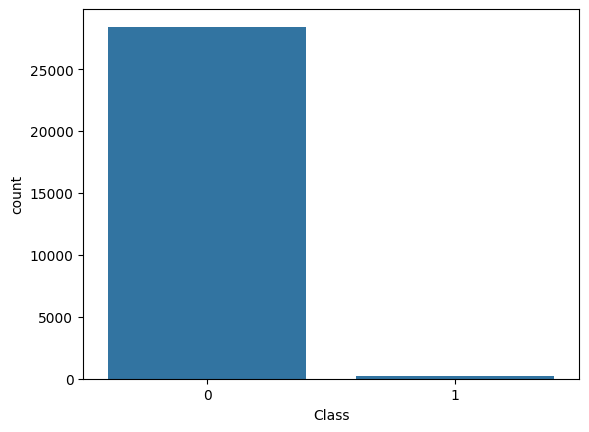

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Exploratory Data Analysis
print(data.head())
print(data.describe())
print(data.isnull().sum())

# Check class balance
print(data['Class'].value_counts(normalize=True))

# Plotting for visual analysis
sns.countplot(x='Class', data=data)
plt.show()

In [24]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = data.drop('Class', axis=1) 
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9987796373779637
Confusion Matrix:
 [[5688    0]
 [   7   41]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       1.00      0.85      0.92        48

    accuracy                           1.00      5736
   macro avg       1.00      0.93      0.96      5736
weighted avg       1.00      1.00      1.00      5736



### Confusion Matrix 확인 결과

True Negative(TN) = 5688: 모델이 음성 클래스(클래스 0)를 5688회 정확하게 예측  
False Positive(FP) = 0: 실제로는 클래스 0이었는데 모델이 양성 클래스(클래스 1)를 0번 잘못 예측  
False Negative(FN) = 7: 실제로는 양성 클래스(클래스 1)였으나 모델은 음성 클래스를 7번 잘못 예측  
True Positive(TP) = 41: 모델이 양성 클래스를 41번 정확하게 예측  

모델은 클래스 0을 식별하는 데는 문제가 없지만 클래스 1에서는 약간의 문제가 발생하였다. 이는 데이테에 클래스 0이 너무 많아 클래스 불균형에서 발생한 문제이다.  
만약 클래스 1을 예측하는 것이 중요하다면 해당 모델은 1을 더욱 잘 예측할 수 있도록 수정하는 것이 필요하다.